#Практична робота 8
## Розробка рекомендаційної системи
## Авдєєва Серафима ФІТ 4-4

In [35]:
!pip install scikit-surprise

In [36]:
from surprise import Dataset
from surprise import SVD, SVDpp, NMF, KNNBasic, KNNWithZScore
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
# Використати датасет   movielens-100k
data = Dataset.load_builtin(name='ml-100k')

In [38]:
# Для кращого розуміння роздрукуйте датасет.
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])
print(df.head())

  user item  rating  timestamp
0  196  242     3.0  881250949
1  186  302     3.0  891717742
2   22  377     1.0  878887116
3  244   51     2.0  880606923
4  166  346     1.0  886397596


In [39]:
#Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір
svd_alg = SVD()
svdpp_alg = SVDpp()
nmf_alg = NMF()
knnbasic_alg = KNNBasic()
knnzscore_alg = KNNWithZScore()

In [40]:
# Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації.
cv_svd = cross_validate(svd_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(svdpp_alg , data, measures=['RMSE'], cv=5, verbose=True)
cv_nmf = cross_validate(nmf_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_knnbasic = cross_validate(knnbasic_alg, data, measures=['RMSE'], cv=5, verbose=True)
cv_knnwithzscore = cross_validate(knnzscore_alg, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9357  0.9300  0.9308  0.9399  0.9400  0.9353  0.0043  
Fit time          1.74    1.51    1.41    4.04    3.13    2.37    1.04    
Test time         0.16    0.24    0.23    0.29    0.25    0.23    0.05    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9118  0.9269  0.9225  0.9140  0.9173  0.9185  0.0055  
Fit time          29.70   26.56   26.71   26.81   27.14   27.39   1.17    
Test time         5.22    4.58    6.30    4.35    4.59    5.01    0.71    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9594  0.9665  0.9624  0.9685  0.9629  0.9639  0.0032  
Fit time          2.11    2.13    2.48    2.31    2.13    2.23    0.15    
Test time         0.27    

In [41]:
# Обчисліть середнє значення середньоквадратичної помилки RMSE
# для кожного алгоритму на основі результатів крос-валідації.
rmse_svd = cv_svd['test_rmse'].mean()
rmse_svdpp = cv_svdpp['test_rmse'].mean()
rmse_nmf = cv_nmf['test_rmse'].mean()
rmse_knnbasic = cv_knnbasic['test_rmse'].mean()
rmse_knnwithzscore = cv_knnwithzscore['test_rmse'].mean()

In [42]:
print(f"SVD: {rmse_svd}")
print(f"SVDpp: {rmse_svdpp}")
print(f"NMF: {rmse_nmf}")
print(f"KNNBasic: {rmse_knnbasic}")
print(f"KNNWithZScore: {rmse_knnwithzscore}")

SVD: 0.9352673189836175
SVDpp: 0.9184887391672485
NMF: 0.9639248655232
KNNBasic: 0.9776967014534014
KNNWithZScore: 0.9512339705362954


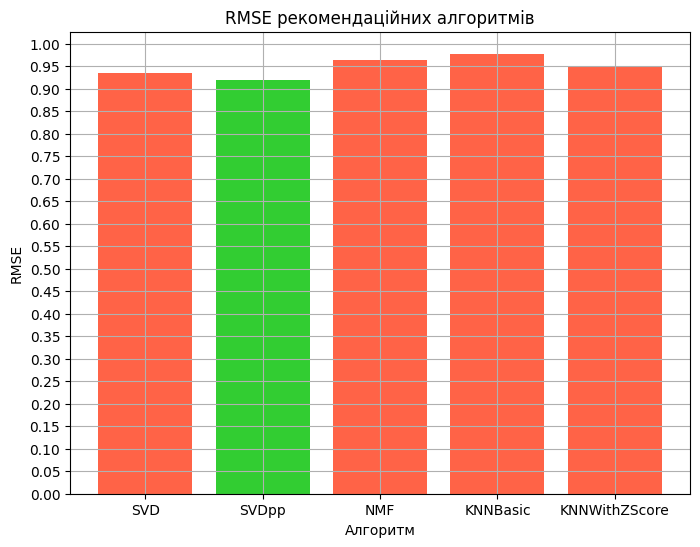

Оптимальний алгоритм: SVDpp
Його значення RMSE: 0.9184887391672485


In [43]:
# Виберіть оптимальний алгоритм
# (Зазвичай, алгоритм з найменшим значенням RMSE
# вважається найкращим для даного завдання рекомендації)
rmse_values = [rmse_svd, rmse_svdpp, rmse_nmf, rmse_knnbasic, rmse_knnwithzscore]
algs = ['SVD', 'SVDpp', 'NMF', 'KNNBasic', 'KNNWithZScore']

best_alg_index = rmse_values.index(min(rmse_values))
best_alg = algs[best_alg_index]
best_rmse = rmse_values[best_alg_index]

# Зробіть візуалізацію
plt.figure(figsize=(8, 6))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.grid()
plt.bar(algs, rmse_values, color=['tomato' if alg != best_alg else 'limegreen' for alg in algs])
plt.title('RMSE рекомендаційних алгоритмів')
plt.xlabel('Алгоритм')
plt.ylabel('RMSE')
plt.show()

print(f"Оптимальний алгоритм: {best_alg}\nЙого значення RMSE: {best_rmse}")

# Висновок:

У цій роботі ми розробили рекомендаційну систему з використанням бібліотеки Surprise на основі датасету "movielens-100k". Ми провели крос-валідацію для кількох різних алгоритмів, а саме SVD, SVD++, NMF, KNNBasic, та KNNWithZScore, з метою вибору найкращого алгоритму для нашої рекомендаційної системи.

Після аналізу результатів крос-валідації ми визначили, що оптимальним алгоритмом для даного завдання є SVDpp, який показав найменше значення середньоквадратичної помилки (RMSE) серед усіх розглянутих алгоритмів. Це свідчить про те, що цей алгоритм надає найкращі рекомендації для користувачів нашої системи на основі доступних даних.

Отже, в результаті виконаної роботи ми успішно розробили та оптимізували рекомендаційну систему, яка здатна надавати користувачам більш точні та персоналізовані рекомендації на основі їхніх попередніх взаємодій з контентом. Це може бути важливим інструментом для підвищення задоволення користувачів та збільшення участі в системі.